In [7]:
import json
import matplotlib.pyplot as plt

In [3]:
def get_json_data(path):
    with open(path, "r+") as file:
        return json.load(file)

In [10]:
results = [get_json_data("results/result_500_{}.json".format(i)) for i in [10, 30, 50, 70]]

In [11]:
def plot_res(res,
            start_num_layers = 3,
            total_layers = 10):
    fig, ax = plt.subplots()

    ax.plot(res["train_acc_non_mutable"], label = "Train Accuracy non mutable")
    ax.plot(res["test_acc_non_mutable"], label = "Test Accuracy non mutable", linestyle='--')
    ax.plot(res["train_acc_mutable"], label = "Train Accuracy mutable")
    ax.plot(res["test_acc_mutable"], label = "Test Accuracy mutable",linestyle='--')

    addition_points = [i for i in range(0, res["iteration"], res["add_gap"])][:total_layers - start_num_layers]
    addition_accuracies =  [res["train_acc_mutable"][i] for i in addition_points]
    plt.scatter(addition_points, addition_accuracies)
    ax.legend()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Accuracy")
    ax.set_title("Node addition gap: {}".format(res["add_gap"]))
    # .show()

    for i in range(total_layers - start_num_layers):
        ax.annotate(start_num_layers + 1 + i, (addition_points[i], addition_accuracies[i]))
    
    return fig

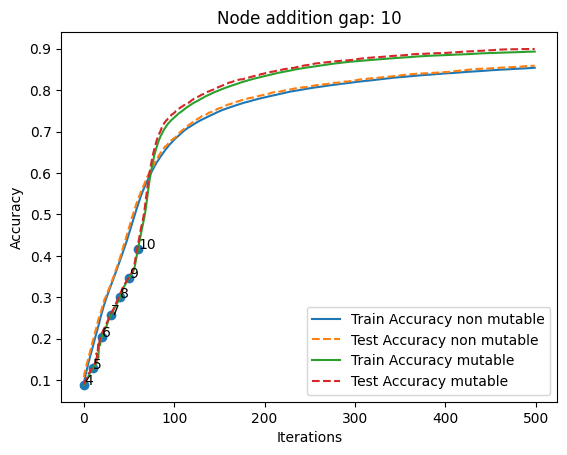

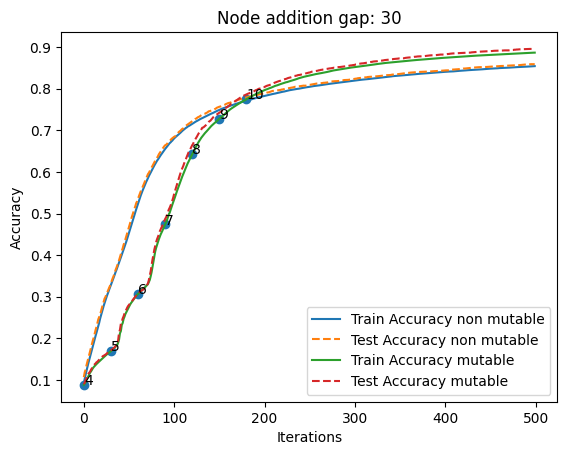

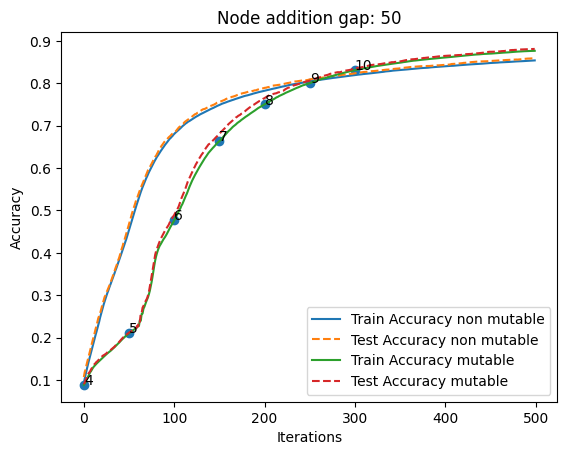

In [12]:
plots = [plot_res(result) for result in results ]